In [49]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit import IPythonConsole
from rdkit.Chem import rdMolDescriptors
import numpy as np
IPythonConsole.ipython_useSVG = True

In [3]:
from tqdm.auto import tqdm

In [4]:
tqdm.pandas()

### Gather data

In [21]:
target = new_client.target
mol = new_client.molecule
bio = new_client.activity

In [22]:
targets = target.get(target_components__accession="P08581").only('target_type', 'target_chembl_id', 'pref_name', 'organism')

In [23]:
len(targets)

1

In [24]:
targets[0]

{'organism': 'Homo sapiens',
 'pref_name': 'Hepatocyte growth factor receptor',
 'target_chembl_id': 'CHEMBL3717',
 'target_type': 'SINGLE PROTEIN'}

In [25]:
# bioactivities = bio.filter(
#     target_chembl_id="CHEMBL3717", type="IC50", relation="=", assay_type="B"
# )

bioactivities = bio.filter(
    target_chembl_id="CHEMBL3717", type="IC50", assay_type="B"
)

In [26]:
len(bioactivities)

5214

In [27]:
from tqdm.auto import tqdm

In [28]:
df = pd.DataFrame.from_records(list(tqdm(bioactivities)))

  0%|          | 0/5214 [00:00<?, ?it/s]

In [29]:
df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [37]:
! pwd

/home/ramin/Desktop/personal/cheminfo/met


In [30]:
df.to_csv("bioactivity_v2.csv", index=False)

In [31]:
df = pd.read_csv("bioactivity_v2.csv", engine='pyarrow', dtype_backend='pyarrow')

In [32]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,<NA>,<NA>,653063,[],CHEMBL820578,Inhibition of c-Met autophosphorylation of in ...,B,<NA>,<NA>,BAO_0000190,...,Homo sapiens,Hepatocyte growth factor receptor,9606,None,None,IC50,nM,UO_0000065,<NA>,10000.0
1,<NA>,<NA>,750649,[],CHEMBL880758,Inhibition of MET kinase activity,B,<NA>,<NA>,BAO_0000190,...,Homo sapiens,Hepatocyte growth factor receptor,9606,None,None,IC50,nM,UO_0000065,<NA>,10000.0
2,<NA>,<NA>,1068014,[],CHEMBL711149,Inhibition of Met proto-oncogene tyrosine kinase,B,<NA>,<NA>,BAO_0000190,...,Homo sapiens,Hepatocyte growth factor receptor,9606,None,None,IC50,uM,UO_0000065,<NA>,10.0
3,<NA>,<NA>,1070529,[],CHEMBL711149,Inhibition of Met proto-oncogene tyrosine kinase,B,<NA>,<NA>,BAO_0000190,...,Homo sapiens,Hepatocyte growth factor receptor,9606,None,None,IC50,uM,UO_0000065,<NA>,10.0
4,<NA>,<NA>,1173958,[],CHEMBL697832,Inhibition of Hepatocyte growth factor receptor,B,<NA>,<NA>,BAO_0000190,...,Homo sapiens,Hepatocyte growth factor receptor,9606,None,None,IC50,uM,UO_0000065,<NA>,100.0


In [35]:
df[['standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value']]

,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value
0,>,None,IC50,nM,None,10000.0
1,>,None,IC50,nM,None,10000.0
2,>,None,IC50,nM,None,10000.0
3,>,None,IC50,nM,None,10000.0
4,>,None,IC50,nM,None,100000.0
...,...,...,...,...,...,...
5209,>,None,IC50,nM,None,10000.0
5210,>,None,IC50,nM,None,10000.0
5211,>,None,IC50,nM,None,10000.0
5212,=,None,IC50,nM,None,3011.0


In [33]:
df.bao_label.unique()

<ArrowExtensionArray>
['cell-based format', 'single protein format', 'assay format']
Length: 3, dtype: string[pyarrow]

In [34]:
df.standard_units.unique()

<ArrowExtensionArray>
['nM', <NA>, 'ug.mL-1']
Length: 3, dtype: string[pyarrow]

In [39]:
df_mod = (df
 .drop(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format','data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency','molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type','standard_upper_value','target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'], axis=1)
 .query("bao_label == 'cell-based format'")
 .drop_duplicates('molecule_chembl_id')
 .query("standard_units == 'nM'")
 .drop(['bao_label', 'standard_units'], axis=1)
 .rename(
     columns = {'canonical_smiles': 'SMILES', 'standard_value': 'IC50'}
 )
 .reset_index(drop=True)
)

In [40]:
df_mod.to_csv("cleaned_bioactivity_v2.csv", index=False)

### main

In [41]:
df = pd.read_csv("cleaned_bioactivity_v2.csv", engine='pyarrow', dtype_backend='pyarrow')

In [42]:
df.head()

,SMILES,molecule_chembl_id,IC50
0,COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2c...,CHEMBL352308,10000.0
1,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,CHEMBL281957,100000.0
2,COc1cc2nccc(Oc3ccc(NC(=O)Nc4ccc(F)cc4F)c(F)c3)...,CHEMBL178455,10000.0
3,COc1cc2nccc(Oc3ccc(NC(=S)NC(=O)Cc4ccccc4)cc3F)...,CHEMBL404881,121.0
4,CSc1cc2nccc(Oc3ccc(NC(=S)NC(=O)Cc4ccccc4)cc3F)...,CHEMBL256920,130.0


In [43]:
df.dtypes

SMILES                string[pyarrow]
molecule_chembl_id    string[pyarrow]
IC50                  double[pyarrow]
dtype: object

In [44]:
df.shape

(687, 3)

In [45]:
import datamol as dm

In [46]:
dm.molar.molar_to_log(1000, unit='nM')

6.0

In [47]:
df['pIC50'] = df.IC50.apply(dm.molar.molar_to_log, unit='nM')

In [48]:
df.query('pIC50 >= 6.0').shape

(551, 4)

In [72]:
df.query('pIC50 < 6.0').shape

(136, 47)

### category imbalance

There are 551 molecules in the active class and this will cause category imbalance and the model to overfit. in order to reduce that I will add decoy structures from DUDE that are inactive against met [link to DUDE](https://dude.docking.org/targets/met)

In [58]:
decoy_smiles = []
with open('./decoy/met/decoys_final.ism', 'r') as f:
    list_lines = f.readlines()
    decoy_smiles = [x.strip().split(' ')[0] for x in list_lines]


decoy_smiles[:10]

['Cc1ccc(cc1)[C@@H]2C(=C(NC(=O)N2)C[NH+]3CCSCC3)C(=O)OC',
 'C[NH2+][C@@H](c1cc2ccccc2[nH]1)c3nnnn3c4ccc(cc4)Cl',
 'c1ccc2c(c1)ccc(c2C[NH+]3CCc4c(c(=O)[nH]c(n4)N5CCCC5)C3)O',
 'Cc1ccc(o1)C[NH2+]Cc2cc3c(nn(c3[nH]c2=O)c4ccccc4)C',
 'c1cc[nH+]c(c1)N[C@H](c2ccc3c(c2)OCO3)c4ccc5cccnc5c4O',
 'COC(=O)c1c(c2c3c(c([nH+]c2s1)N4CCOCC4)CCCC3)N',
 'Cc1ccc(o1)CNC(=O)c2c3c(n(n2)C)CC[C@@H](C3)[NH2+]C4CCCC4',
 'Cc1ccc(cc1F)c2nc(on2)[C@@H]3C[C@H](C[NH+]3Cc4ccccc4O)O',
 'CC(C)(CNC(=O)c1c2c([nH]n1)-c3ccccc3OC2)[NH+]4CCCCC4',
 'Cc1c(c(n[nH]1)C)C[NH+](C)Cc2ccc(cc2)c3[nH]c(=O)c4c(n3)CCC4']

In [59]:
len(decoy_smiles)

11250

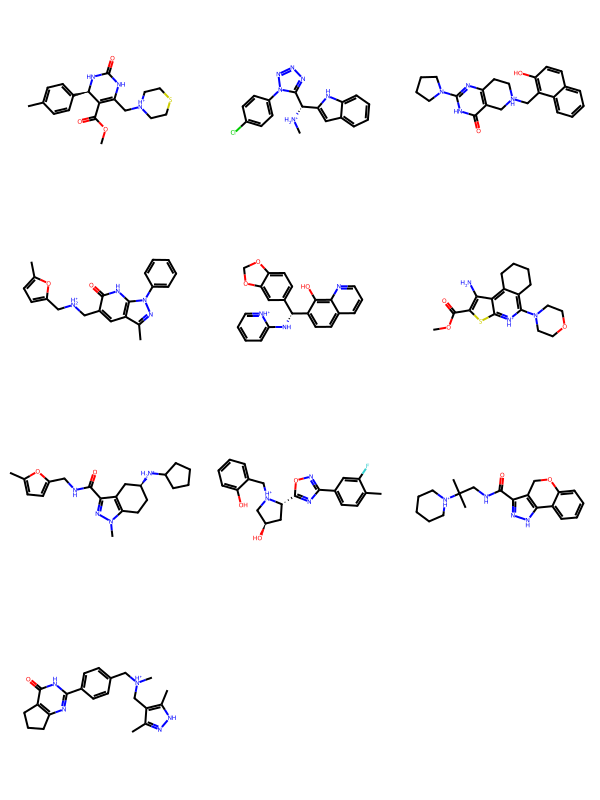

In [20]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in decoy_smiles[:10]], useSVG=True)

In [50]:
property_names = list(rdMolDescriptors.Properties.GetAvailableProperties())
property_getter = rdMolDescriptors.Properties(property_names)

In [51]:
def smi2props(smi):
    mol = Chem.MolFromSmiles(smi)
    props = None
    if mol:
        Chem.DeleteSubstructs(mol, Chem.MolFromSmarts("[#1X0]"))
        props = np.array(property_getter.ComputeProperties(mol))
    return props

In [53]:
df['props'] = df.SMILES.progress_apply(smi2props)
df[property_names] = df['props'].to_list()
df = df.drop(columns='props')

  0%|          | 0/687 [00:00<?, ?it/s]

In [66]:
mean_main_mw = df.exactmw.mean()
mean_main_mw

474.432736260504

In [68]:
mean_main_mw_upper = 0.1*mean_main_mw + mean_main_mw
mean_main_mw_lower = mean_main_mw - 0.1*mean_main_mw

In [63]:
decoy_df = pd.DataFrame({'SMILES': decoy_smiles})

In [64]:
decoy_df.head()

,SMILES
0,Cc1ccc(cc1)[C@@H]2C(=C(NC(=O)N2)C[NH+]3CCSCC3)...
1,C[NH2+][C@@H](c1cc2ccccc2[nH]1)c3nnnn3c4ccc(cc...
2,c1ccc2c(c1)ccc(c2C[NH+]3CCc4c(c(=O)[nH]c(n4)N5...
3,Cc1ccc(o1)C[NH2+]Cc2cc3c(nn(c3[nH]c2=O)c4ccccc4)C
4,c1cc[nH+]c(c1)N[C@H](c2ccc3c(c2)OCO3)c4ccc5ccc...


In [65]:
decoy_df['props'] = decoy_df.SMILES.progress_apply(smi2props)
decoy_df[property_names] = decoy_df['props'].to_list()
decoy_df = decoy_df.drop(columns='props')

  0%|          | 0/11250 [00:00<?, ?it/s]

In [70]:
decoy_within_10per = decoy_df.query("exactmw < @mean_main_mw_upper and exactmw > @mean_main_mw_lower")

In [73]:
decoy_to_add = decoy_within_10per.sample(200)

In [74]:
df['activity'] = df.pIC50.apply(lambda x: 1 if x > 6 else 0)

In [75]:
df.head()

,SMILES,molecule_chembl_id,IC50,pIC50,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,activity
0,COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2c...,CHEMBL352308,10000.0,5.000000,501.262757,501.627,7.0,3.0,11.0,3.0,...,12.438004,5.933660,5.933660,3.880463,-3.81,26.258629,11.950373,6.903753,8.481092,0
1,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,CHEMBL281957,100000.0,4.000000,483.159266,484.431,6.0,2.0,7.0,2.0,...,10.938280,6.007597,6.007597,4.033909,-2.80,23.361272,9.592921,4.383757,6.790995,0
2,COc1cc2nccc(Oc3ccc(NC(=O)Nc4ccc(F)cc4F)c(F)c3)...,CHEMBL178455,10000.0,5.000000,469.124941,469.419,7.0,2.0,6.0,2.0,...,9.888646,4.802756,4.802756,3.190854,-4.47,22.714274,9.571468,4.800904,6.394381,0
3,COc1cc2nccc(Oc3ccc(NC(=S)NC(=O)Cc4ccccc4)cc3F)...,CHEMBL404881,121.0,6.917215,491.131505,491.544,7.0,2.0,7.0,2.0,...,10.594563,5.076985,5.076985,3.430716,-4.24,23.902719,10.791506,5.822453,7.369895,1
4,CSc1cc2nccc(Oc3ccc(NC(=S)NC(=O)Cc4ccccc4)cc3F)...,CHEMBL256920,130.0,6.886057,483.054518,483.615,5.0,2.0,6.0,2.0,...,9.563088,4.424490,4.424490,2.968100,-3.01,22.193486,10.073414,5.421372,6.986381,1


In [83]:
df = pd.concat(
    [df, decoy_to_add.assign(
        pIC50=lambda adf: 0*len(adf),
        activity=lambda adf: 0*len(adf)
    )
    ],
    axis=0
)

In [84]:
df.query("activity == 1").shape

(541, 48)

In [85]:
df.query("activity == 0").shape

(346, 48)

In [44]:
dm.list_supported_fingerprints()

{'maccs': <function rdkit.Chem.rdMolDescriptors.GetMACCSKeysFingerprint>,
 'pattern': <function rdkit.Chem.rdmolops.PatternFingerprint>,
 'layered': <function rdkit.Chem.rdmolops.LayeredFingerprint>,
 'erg': <function rdkit.Chem.rdReducedGraphs.GetErGFingerprint>,
 'estate': <function datamol.fp.<lambda>(x, **args)>,
 'avalon-count': <function rdkit.Avalon.pyAvalonTools.GetAvalonCountFP>,
 'ecfp': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'fcfp': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'topological': <function rdkit.Chem.rdFingerprintGenerator.GetTopologicalTorsionGenerator>,
 'atompair': <function rdkit.Chem.rdFingerprintGenerator.GetAtomPairGenerator>,
 'rdkit': <function rdkit.Chem.rdFingerprintGenerator.GetRDKitFPGenerator>,
 'ecfp-count': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'fcfp-count': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'topological-count': <function rdkit.Chem.rdFinger

### Testing Classification Models

#### XGBclassifier and LGBMclassifier

In [129]:
from lightgbm import LGBMClassifier, plot_importance #LightGBM models
from xgboost import XGBClassifier #xgboost model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [93]:
fingerprints = ['maccs', 'pattern', 'layered', 'erg','estate', 'avalon-count', 'ecfp', 'fcfp', 'topological', 'atompair', 'rdkit', 'ecfp-count', 'fcfp-count','topological-count', 'atompair-count', 'rdkit-count']

In [103]:
def test_fp_lgbm(df, fingerprints):
    df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
    acc = []
    sens = []
    spec = []
    for fp in fingerprints:
        curr_df = df.copy()
        curr_df['fp'] = df.mol.apply(dm.to_fp, fp_type=fp)
        print("the fp in use: ", fp)
        print("Train test split process ")
        train, test = train_test_split(curr_df, test_size=0.2, random_state=99)
        train_x = train['fp'].to_list()
        train_y = train.activity
        test_x = test['fp'].to_list()
        test_y = test.activity
        
        print("train size, ", len(train_x), "test size, ", len(test_x))
        model = LGBMClassifier()
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        accuracy = accuracy_score(test_y, pred)
        sensitivity = recall_score(test_y, pred)
        specifity = recall_score(test_y, pred, pos_label=0)

        print(accuracy)
        print(sensitivity)
        print(specifity)
        acc.append(accuracy)
        sens.append(sensitivity)
        spec.append(specifity)
    return pd.DataFrame({'fingerprint':fingerprints, 'accuracy':acc, 'sens':sens, 'specifity':spec})

In [104]:
lgbm_result = test_fp_lgbm(df, fingerprints)

the fp in use:  maccs
Train test split process 
train size,  709 test size,  178
[LightGBM] [Info] Number of positive: 428, number of negative: 281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.603667 -> initscore=0.420769
[LightGBM] [Info] Start training from score 0.420769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [105]:
lgbm_result

,fingerprint,accuracy,sens,specifity
0,maccs,0.876404,0.929204,0.784615
1,pattern,0.882022,0.920354,0.815385
2,layered,0.893258,0.938053,0.815385
3,erg,0.853933,0.876106,0.815385
4,estate,0.882022,0.920354,0.815385
5,avalon-count,0.882022,0.902655,0.846154
6,ecfp,0.915730,0.955752,0.846154
7,fcfp,0.898876,0.920354,0.861538
8,topological,0.898876,0.955752,0.800000
9,atompair,0.893258,0.938053,0.815385


In [106]:
def test_fp_xgboost(df, fingerprints):
    df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
    acc = []
    sens = []
    spec = []
    for fp in fingerprints:
        curr_df = df.copy()
        curr_df['fp'] = df.mol.apply(dm.to_fp, fp_type=fp)
        print("the fp in use: ", fp)
        print("Train test split process ")
        train, test = train_test_split(curr_df, test_size=0.2, random_state=99)
        train_x = train['fp'].to_list()
        train_y = train.activity
        test_x = test['fp'].to_list()
        test_y = test.activity
        
        print("train size, ", len(train_x), "test size, ", len(test_x))
        model = XGBClassifier()
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        accuracy = accuracy_score(test_y, pred)
        sensitivity = recall_score(test_y, pred)
        specifity = recall_score(test_y, pred, pos_label=0)

        print(accuracy)
        print(sensitivity)
        print(specifity)
        acc.append(accuracy)
        sens.append(sensitivity)
        spec.append(specifity)
    return pd.DataFrame({'fingerprint':fingerprints, 'accuracy':acc, 'sens':sens, 'specifity':spec})

In [107]:
xgb_result = test_fp_xgboost(df, fingerprints)

the fp in use:  maccs
Train test split process 
train size,  709 test size,  178
0.8539325842696629
0.9203539823008849
0.7384615384615385
the fp in use:  pattern
Train test split process 
train size,  709 test size,  178
0.8820224719101124
0.9203539823008849
0.8153846153846154
the fp in use:  layered
Train test split process 
train size,  709 test size,  178
0.8876404494382022
0.9380530973451328
0.8
the fp in use:  erg
Train test split process 
train size,  709 test size,  178
0.848314606741573
0.8761061946902655
0.8
the fp in use:  estate
Train test split process 
train size,  709 test size,  178
0.8764044943820225
0.9292035398230089
0.7846153846153846
the fp in use:  avalon-count
Train test split process 
train size,  709 test size,  178
0.8764044943820225
0.8938053097345132
0.8461538461538461
the fp in use:  ecfp
Train test split process 
train size,  709 test size,  178
0.9101123595505618
0.9646017699115044
0.8153846153846154
the fp in use:  fcfp
Train test split process 
train siz

In [108]:
xgb_result

,fingerprint,accuracy,sens,specifity
0,maccs,0.853933,0.920354,0.738462
1,pattern,0.882022,0.920354,0.815385
2,layered,0.887640,0.938053,0.800000
3,erg,0.848315,0.876106,0.800000
4,estate,0.876404,0.929204,0.784615
5,avalon-count,0.876404,0.893805,0.846154
6,ecfp,0.910112,0.964602,0.815385
7,fcfp,0.887640,0.911504,0.846154
8,topological,0.910112,0.964602,0.815385
9,atompair,0.882022,0.920354,0.815385


_**So far the xgboost-ecfpcount and the lgbm-ecfpcount are the best models with lgbm performing slighlty better**_

### Random Forests

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
def test_fp_rf(df, fingerprints):
    df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
    acc = []
    sens = []
    spec = []
    for fp in fingerprints:
        curr_df = df.copy()
        curr_df['fp'] = df.mol.apply(dm.to_fp, fp_type=fp)
        print("the fp in use: ", fp)
        print("Train test split process ")
        train, test = train_test_split(curr_df, test_size=0.2, random_state=99)
        train_x = train['fp'].to_list()
        train_y = train.activity
        test_x = test['fp'].to_list()
        test_y = test.activity
        
        print("train size, ", len(train_x), "test size, ", len(test_x))
        model = RandomForestClassifier()
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        accuracy = accuracy_score(test_y, pred)
        sensitivity = recall_score(test_y, pred)
        specifity = recall_score(test_y, pred, pos_label=0)

        print(accuracy)
        print(sensitivity)
        print(specifity)
        acc.append(accuracy)
        sens.append(sensitivity)
        spec.append(specifity)
    return pd.DataFrame({'fingerprint':fingerprints, 'accuracy':acc, 'sens':sens, 'specifity':spec})

In [111]:
rf_result = test_fp_rf(df, fingerprints)

the fp in use:  maccs
Train test split process 
train size,  709 test size,  178
0.8764044943820225
0.9292035398230089
0.7846153846153846
the fp in use:  pattern
Train test split process 
train size,  709 test size,  178
0.8876404494382022
0.9380530973451328
0.8
the fp in use:  layered
Train test split process 
train size,  709 test size,  178
0.8932584269662921
0.9292035398230089
0.8307692307692308
the fp in use:  erg
Train test split process 
train size,  709 test size,  178
0.8707865168539326
0.9026548672566371
0.8153846153846154
the fp in use:  estate
Train test split process 
train size,  709 test size,  178
0.8820224719101124
0.9203539823008849
0.8153846153846154
the fp in use:  avalon-count
Train test split process 
train size,  709 test size,  178
0.8820224719101124
0.911504424778761
0.8307692307692308
the fp in use:  ecfp
Train test split process 
train size,  709 test size,  178
0.9044943820224719
0.9557522123893806
0.8153846153846154
the fp in use:  fcfp
Train test split pro

In [112]:
rf_result

,fingerprint,accuracy,sens,specifity
0,maccs,0.876404,0.929204,0.784615
1,pattern,0.887640,0.938053,0.800000
2,layered,0.893258,0.929204,0.830769
3,erg,0.870787,0.902655,0.815385
4,estate,0.882022,0.920354,0.815385
5,avalon-count,0.882022,0.911504,0.830769
6,ecfp,0.904494,0.955752,0.815385
7,fcfp,0.904494,0.946903,0.830769
8,topological,0.898876,0.938053,0.830769
9,atompair,0.921348,0.955752,0.861538


_**RandomForests-atompaircount performed better than other RF modles**_

**For now I will use LGBM-ecfpcount model**

**Testing with descriptors and fingerprints togheter**

In [118]:
df.head()

,SMILES,molecule_chembl_id,IC50,pIC50,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,...,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,activity,mol
0,COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2c...,CHEMBL352308,10000.0,5.000000,501.262757,501.627,7.0,3.0,11.0,3.0,...,5.933660,5.933660,3.880463,-3.81,26.258629,11.950373,6.903753,8.481092,0,<rdkit.Chem.rdchem.Mol object at 0x7c68aa5b91c0>
1,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,CHEMBL281957,100000.0,4.000000,483.159266,484.431,6.0,2.0,7.0,2.0,...,6.007597,6.007597,4.033909,-2.80,23.361272,9.592921,4.383757,6.790995,0,<rdkit.Chem.rdchem.Mol object at 0x7c68aa5bb450>
2,COc1cc2nccc(Oc3ccc(NC(=O)Nc4ccc(F)cc4F)c(F)c3)...,CHEMBL178455,10000.0,5.000000,469.124941,469.419,7.0,2.0,6.0,2.0,...,4.802756,4.802756,3.190854,-4.47,22.714274,9.571468,4.800904,6.394381,0,<rdkit.Chem.rdchem.Mol object at 0x7c68aa5b9150>
3,COc1cc2nccc(Oc3ccc(NC(=S)NC(=O)Cc4ccccc4)cc3F)...,CHEMBL404881,121.0,6.917215,491.131505,491.544,7.0,2.0,7.0,2.0,...,5.076985,5.076985,3.430716,-4.24,23.902719,10.791506,5.822453,7.369895,1,<rdkit.Chem.rdchem.Mol object at 0x7c68aa5ba500>
4,CSc1cc2nccc(Oc3ccc(NC(=S)NC(=O)Cc4ccccc4)cc3F)...,CHEMBL256920,130.0,6.886057,483.054518,483.615,5.0,2.0,6.0,2.0,...,4.424490,4.424490,2.968100,-3.01,22.193486,10.073414,5.421372,6.986381,1,<rdkit.Chem.rdchem.Mol object at 0x7c68aa5b8970>


In [139]:
def test_naive(df, model, selected_desc):
    df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

    curr_df = df.copy()
    curr_df['fp'] = df.mol.apply(dm.to_fp, fp_type='ecfp-count')

    print("Train test split process ")
    train, test = train_test_split(curr_df, test_size=0.2, random_state=99)
    train_x = train['fp'].to_list()
    train_y = train.activity
    test_x = test['fp'].to_list()
    test_y = test.activity

    print("train size, ", len(train_x), "test size, ", len(test_x))
    print("fitting ... ")
    model.fit(train_x, train_y)
    print("fit finished ...")
    pred = model.predict(test_x)
    curr_acc = accuracy_score(test_y, pred)
    curr_sens = recall_score(test_y,pred)
    curr_spec = recall_score(test_y, pred)
    print(curr_acc)
    print(curr_sens)
    print(curr_spec)
    return curr_acc, curr_sens, curr_spec

In [140]:
lgbm = LGBMClassifier()

In [141]:
test_naive(df, lgbm, property_names)

Train test split process 
train size,  709 test size,  178
fitting ... 
[LightGBM] [Info] Number of positive: 428, number of negative: 281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2100
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 743
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.603667 -> initscore=0.420769
[LightGBM] [Info] Start training from score 0.420769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

(0.9325842696629213, 0.9646017699115044, 0.9646017699115044)

#### cross validation

In [145]:
def cross_validate_(df, model, n_splits=5, random_state=85):
    df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
    curr_df = df.copy()
    curr_df['fp'] = df.mol.apply(dm.to_fp, fp_type='ecfp-count')
    X = curr_df['fp'].to_list()  # This is now a list, not a DataFrame
    y = curr_df.activity.values  # Convert to numpy array for consistency
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    fold_acc_scores = []
    fold_sens_scores = []
    fold_spec_scores = []
    fold_predictions = []
    fold_actual = []
    
    print(f"Starting {n_splits}-fold cross-validation...")
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold+1}/{n_splits}")
        
        # Use numpy indexing for lists
        X_train = [X[i] for i in train_idx]
        X_test = [X[i] for i in test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        
        print(f"  Training model on {len(X_train)} samples...")
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        sens = recall_score(y_test, y_pred) 
        spec = recall_score(y_test, y_pred, pos_label=0)
        
        print(f"  Fold {fold+1} - acc: {acc:.4f}, sens: {sens:.4f}, spec: {spec:.4f}")
        
        fold_acc_scores.append(acc)
        fold_sens_scores.append(sens)
        fold_spec_scores.append(spec)
        fold_predictions.extend(y_pred)
        fold_actual.extend(y_test)
    
    mean_acc = np.mean(fold_acc_scores)
    std_acc = np.std(fold_acc_scores)
    mean_sens = np.mean(fold_sens_scores)
    std_sens = np.std(fold_sens_scores)
    mean_spec = np.mean(fold_spec_scores)
    std_spec = np.std(fold_spec_scores)
    
    overall_acc = accuracy_score(fold_actual, fold_predictions)
    overall_sens = recall_score(fold_actual, fold_predictions)
    overall_spec = recall_score(fold_actual, fold_predictions, pos_label=0)
    
    results = {
        'fold_acc_scores': fold_acc_scores,
        'fold_sens_scores': fold_sens_scores,
        'fold_spec_scores': fold_spec_scores,
        'mean_acc': mean_acc,
        'std_acc': std_acc,
        'mean_sens': mean_sens,
        'std_sens': std_sens,
        'mean_spec': mean_spec,
        'std_spec': std_spec,
        'overall_acc': overall_acc,
        'overall_sens': overall_sens,
        'overall_spec': overall_spec
    }
    
    # Print summary
    print("\n" + "="*50)
    print("Cross-Validation Summary:")
    print(f"Mean acc: {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"Mean sens: {mean_sens:.4f} ± {std_sens:.4f}")
    print(f"Mean spec: {mean_spec:.4f} ± {std_spec:.4f}")
    print(f"Overall acc (all folds combined): {overall_acc:.4f}")
    print(f"Overall sens (all folds combined): {overall_sens:.4f}")
    print(f"Overall spec (all folds combined): {overall_spec:.4f}")
    print("="*50)
    return results

In [150]:
lgbm = LGBMClassifier()

In [151]:
lgbm_result = cross_validate_(df, lgbm)

Starting 5-fold cross-validation...

Fold 1/5
  Training model on 709 samples...
[LightGBM] [Info] Number of positive: 441, number of negative: 268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2122
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 756
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.622003 -> initscore=0.498058
[LightGBM] [Info] Start training from score 0.498058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [152]:
df_to_test = pd.read_csv('./drugs_invest.csv')

In [154]:
df_to_test.shape

(6263, 5)

In [155]:
df_to_test['mol'] = df_to_test.SMILES.apply(Chem.MolFromSmiles)

[02:40:48] Explicit valence for atom # 84 N, 4, is greater than permitted
[02:40:48] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[02:40:48] SMILES Parse Error: check for mistakes around position 76:
[02:40:48] C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C
[02:40:48] ~~~~~~~~~~~~~~~~~~~~^
[02:40:48] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
[02:40:48] Explicit valence for atom # 1 Cl, 4, is greater than permitted
[02:40:48] WARNING: not removing hydrogen atom without neighbors
[02:40:48] WARNING: not removing hydrogen atom without neighbors
[02:40:49] Explicit valence for atom # 1 B, 6, is greater tha

In [156]:
df_to_test.head()

,type,drugbank_id,groups,name,SMILES,mol
0,small molecule,DB00006,"['approved', 'investigational']",Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7c68a370fb50>
1,small molecule,DB00014,['approved'],Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7c68a370f760>
2,small molecule,DB00027,['approved'],Gramicidin_D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x7c68a370f7d0>
3,small molecule,DB00035,['approved'],Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7c68a370f840>
4,small molecule,DB00050,"['approved', 'investigational']",Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7c68a370fc30>


In [158]:
def safe_to_fp(mol):
    try:
        return dm.to_fp(mol, fp_type='ecfp-count')
    except Exception:
        return None

In [159]:
df_to_test['fp'] = df_to_test.mol.progress_apply(safe_to_fp)

  0%|          | 0/6263 [00:00<?, ?it/s]

In [160]:
df_to_test.query('fp.isna()')

,type,drugbank_id,groups,name,SMILES,mol,fp
2548,small molecule,DB09385,['approved'],Cyanocobalamin_Co-57,[57Co+3].[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H]...,None,None
2910,small molecule,DB11630,"['approved', 'investigational']",Temoporfin,OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...,None,None
3595,small molecule,DB12453,['investigational'],Chlorine_dioxide,O=[Cl]=O,None,None
5560,small molecule,DB17408,['investigational'],Borocaptate,S[10B]1234[10B]567[10B]89%10[10B]%11%12%13[10B...,None,None


In [161]:
df_to_test = df_to_test.query('fp.notna()')

In [163]:
pred = lgbm.predict(df_to_test.fp.to_list())

In [165]:
df_to_test['predict'] = pred

/tmp/ipykernel_92897/453310901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_test['predict'] = pred


In [170]:
df_to_test.query('predict == 1')[['name', 'SMILES', 'groups']].reset_index(drop=True).to_csv('lgbm_active.csv')

In [148]:
xgb = XGBClassifier()

In [149]:
xgb_result = cross_validate_(df, xgb)

Starting 5-fold cross-validation...

Fold 1/5
  Training model on 709 samples...
  Fold 1 - acc: 0.8820, sens: 0.9300, spec: 0.8205

Fold 2/5
  Training model on 709 samples...
  Fold 2 - acc: 0.8483, sens: 0.8739, spec: 0.7966

Fold 3/5
  Training model on 710 samples...
  Fold 3 - acc: 0.8757, sens: 0.9320, spec: 0.7973

Fold 4/5
  Training model on 710 samples...
  Fold 4 - acc: 0.9040, sens: 0.9322, spec: 0.8475

Fold 5/5
  Training model on 710 samples...
  Fold 5 - acc: 0.8927, sens: 0.9307, spec: 0.8421

Cross-Validation Summary:
Mean acc: 0.8805 ± 0.0188
Mean sens: 0.9198 ± 0.0229
Mean spec: 0.8208 ± 0.0215
Overall acc (all folds combined): 0.8805
Overall sens (all folds combined): 0.9187
Overall spec (all folds combined): 0.8208


In [137]:
rf = RandomForestClassifier()

In [138]:
rf_result = cross_validate_(df, rf)

Starting 5-fold cross-validation...

Fold 1/5
  Training model on 709 samples...
  Fold 1 - acc: 0.8876, sens: 0.9700, spec: 0.7821

Fold 2/5
  Training model on 709 samples...
  Fold 2 - acc: 0.8483, sens: 0.8992, spec: 0.7458

Fold 3/5
  Training model on 710 samples...
  Fold 3 - acc: 0.8757, sens: 0.9126, spec: 0.8243

Fold 4/5
  Training model on 710 samples...
  Fold 4 - acc: 0.9040, sens: 0.9322, spec: 0.8475

Fold 5/5
  Training model on 710 samples...
  Fold 5 - acc: 0.9040, sens: 0.9307, spec: 0.8684

Cross-Validation Summary:
Mean acc: 0.8839 ± 0.0207
Mean sens: 0.9289 ± 0.0239
Mean spec: 0.8136 ± 0.0444
Overall acc (all folds combined): 0.8839
Overall sens (all folds combined): 0.9279
Overall spec (all folds combined): 0.8150


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [145]:
logreg = LogisticRegression(random_state=1, max_iter=10000)

In [146]:
logreg.fit(train_x, train_y)

LogisticRegression(max_iter=10000, random_state=1)

In [147]:
logreg.score(test_x, test_y)

0.7578125

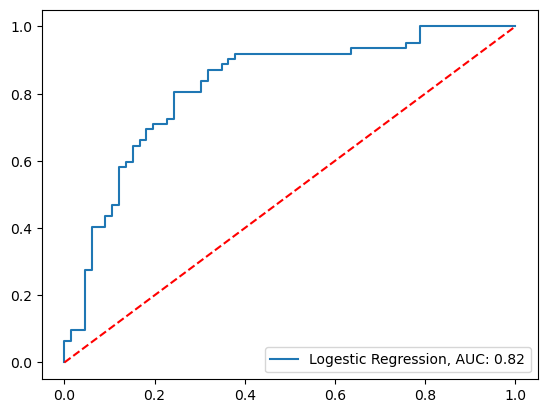

In [148]:
test_prob = logreg.predict_proba(test_x)[:,1]
fpr, tpr, trs = roc_curve(test_y, test_prob)

plt.plot(fpr, tpr, label= f"Logestic Regression, AUC: {roc_auc_score(test_y, test_prob):.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.legend(loc="lower right")
plt.show()

In [149]:
logreg_pred = logreg.predict(test_x)

In [150]:
print(recall_score(test_y, logreg_pred))
print(recall_score(test_y, logreg_pred, pos_label=0))


0.8064516129032258
0.7121212121212122


In [151]:
confusion_matrix(test_y, logreg_pred)

array([[47, 19],
       [12, 50]])

In [152]:
import seaborn as sns

In [195]:
confusion_matrix(test_y, logreg_pred)

array([[47, 19],
       [12, 50]])

### Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
param = {
    "n_estimators": 100,
    "criterion": "log_loss",
}
model_RF = RandomForestClassifier(**param)

In [156]:
model_RF.fit(train_x, train_y)

RandomForestClassifier(criterion='log_loss')

In [157]:
model_RF.score(test_x, test_y)

0.7734375

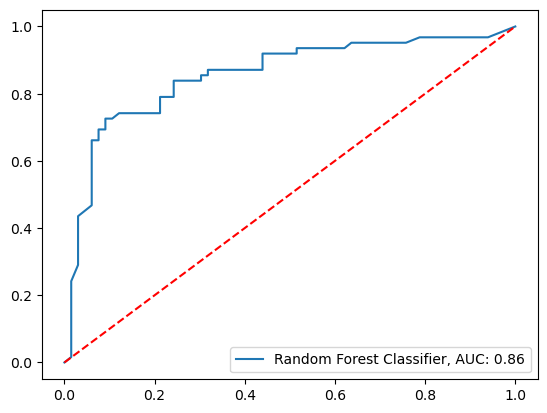

In [158]:
test_prob = model_RF.predict_proba(test_x)[:,1]
fpr, tpr, trs = roc_curve(test_y, test_prob)

plt.plot(fpr, tpr, label= f"Random Forest Classifier, AUC: {roc_auc_score(test_y, test_prob):.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.legend(loc="lower right")
plt.show()

In [159]:
rf_pred = model_RF.predict(test_x)

In [160]:
accuracy_score(test_y, rf_pred)

0.7734375

In [161]:
recall_score(test_y, rf_pred)

0.8387096774193549

In [196]:
confusion_matrix(test_y, rf_pred)

array([[47, 19],
       [10, 52]])

In [162]:
recall_score(test_y, rf_pred, pos_label=0)

0.7121212121212122

### SVM

In [163]:
from sklearn import svm

In [164]:
model_SVM = svm.SVC(kernel="poly", C=1, gamma=0.1, probability=True,)

In [165]:
model_SVM.fit(train_x, train_y)

SVC(C=1, gamma=0.1, kernel='poly', probability=True)

In [166]:
model_SVM.score(test_x, test_y)

0.7421875

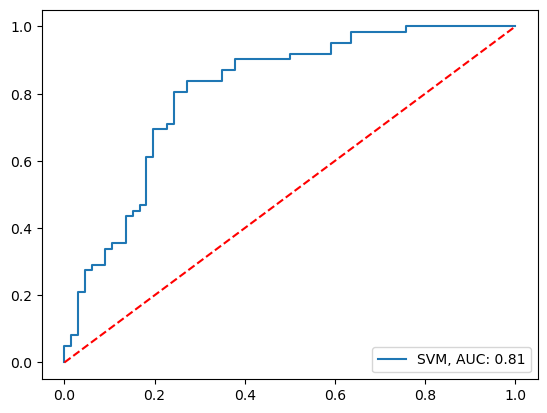

In [167]:
test_prob = model_SVM.predict_proba(test_x)[:,1]
fpr, tpr, trs = roc_curve(test_y, test_prob)

plt.plot(fpr, tpr, label= f"SVM, AUC: {roc_auc_score(test_y, test_prob):.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.legend(loc="lower right")
plt.show()

In [168]:
svm_pred = model_SVM.predict(test_x)

In [169]:
recall_score(test_y, svm_pred)

0.8387096774193549

In [170]:
recall_score(test_y, svm_pred, pos_label=0)

0.6515151515151515

In [171]:
confusion_matrix(test_y, svm_pred)

array([[43, 23],
       [10, 52]])

In [172]:
accuracy_score(test_y, svm_pred)

0.7421875

In [194]:
fp_to_test = dm.fp.to_fp(fp_type='maccs', mol=Chem.MolFromSmiles('CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1'))

In [173]:
drugs_to_test = [dm.fp.to_fp(fp_type='maccs', mol=x) for x in ['CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
 'CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
 'O=C1[C@@H]2[C@H]3CC[C@H](C3)[C@@H]2C(=O)N1C[C@@H]1CCCC[C@H]1CN1CCN(c2nsc3ccccc23)CC1',
 'O=C1CCc2cc(OCCCCc3nnnn3C3CCCCC3)ccc2N1',
 'CCc1nn(CCCN2CCN(c3cccc(Cl)c3)CC2)c(=O)n1CCOc1ccccc1']]

In [174]:
model_RF.predict(drugs_to_test)

array([0, 1, 0, 1, 0])

In [175]:
model_SVM.predict(drugs_to_test)

array([0, 1, 0, 1, 0])

In [176]:
logreg.predict(drugs_to_test)

array([0, 0, 1, 1, 0])

In [ ]:
plt.savefig('roc_plots.svg')

In [187]:
def roc_per_model(models, x, y, save=False):


    fig, ax = plt.subplots()
    for model in models:
        test_prob = model[0].predict_proba(x)[:,1]
        test_pred = model[0].predict(x)
        fpr, tpr, trs = roc_curve(y, test_prob)
        sens = recall_score(y, test_pred)
        spec = recall_score(y, test_pred, pos_label=0)
        acc = accuracy_score(y, test_pred)
        
        ax.plot(fpr, tpr, label= f"{model[1]} , AUC: {roc_auc_score(y, test_prob):.2f}")
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    ax.legend()
    if save == True:
        fig.savefig('roc_plots.svg')

In [188]:
models_to_roc = [(logreg, 'Logestic Regression'), (model_RF, 'Random Forests'), (model_SVM, 'SVM')]

### Results with maccs

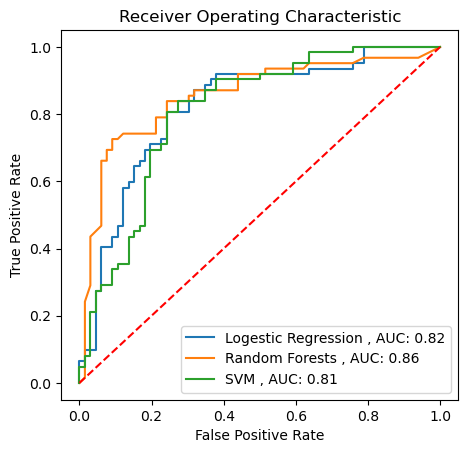

In [189]:
roc_per_model(models_to_roc, test_x, test_y, save=True)

In [190]:
df_to_test = pd.read_csv('./savolotinib_6SDE/wild_mutant.csv')

In [197]:
df_to_test.shape

(39, 8)

In [191]:
df_to_test.head()

,name,method,deltaG_wild,score,SMILES,mol,deltaG_mutant
0,TEPOTINIB,dice_morgan,-12.38,0.280702,CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)cc...,<rdkit.Chem.rdchem.Mol object at 0x7153260747b0>,-10.22
1,CAPMATINIB,swiss,-11.39,0.479000,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F,<rdkit.Chem.rdchem.Mol object at 0x715326074ac0>,-10.25
2,IMATINIB,dice_morgan,-11.37,0.239316,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,<rdkit.Chem.rdchem.Mol object at 0x715326074c10>,-10.07
3,BELUMOSUDIL,dice_morgan,-11.32,0.245614,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3...,<rdkit.Chem.rdchem.Mol object at 0x715326074890>,-11.10
4,ACALABRUTINIB,dice_morgan,-11.06,0.288136,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,<rdkit.Chem.rdchem.Mol object at 0x715326074820>,-8.61


In [192]:
df_to_test['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

In [193]:
df_to_test['maccs'] = df.mol.apply(dm.fp.to_fp, fp_type='maccs')

In [194]:
logreg_predicted = logreg.predict(df_to_test.maccs.to_list())

In [198]:
rf_predicted = model_RF.predict(df_to_test.maccs.to_list())

In [199]:
svm_predicted = model_SVM.predict(df_to_test.maccs.to_list())

In [201]:
df_to_test['rf'] = rf_predicted
df_to_test['svm'] = svm_predicted
df_to_test['logestic'] = logreg_predicted

In [225]:
df_to_test.to_csv('./df_with_predicted_activity.csv', index=False)

Random Forests and SVM algorithms performed better than the others, I will retrain these models with morgan firgerprints

In [124]:
model_RF_morgan = RandomForestClassifier(**param)

In [134]:
train_x_m, test_x_m, train_y_m, test_y_m = train_test_split(df.morgan.to_list(), df.activity.to_list(), test_size=0.3, random_state=4)

In [135]:
model_RF_morgan.fit(train_x_m, train_y_m)

RandomForestClassifier(criterion='log_loss', n_estimators=200)

In [136]:
rf_m_pred = model_RF_morgan.predict(test_x_m)

In [137]:
recall_score(test_y_m, rf_m_pred)

0.8859649122807017

In [138]:
recall_score(test_y_m, rf_m_pred, pos_label=0)

0.782051282051282

In [139]:
model_svm_m = svm.SVC(kernel="poly", C=1, gamma=0.1, probability=True,)

In [140]:
model_svm_m.fit(train_x_m, train_y_m)

SVC(C=1, gamma=0.1, kernel='poly', probability=True)

In [141]:
svm_m_pred = model_svm_m.predict(test_x_m)

In [142]:
recall_score(test_y_m, svm_m_pred)

0.8859649122807017

In [143]:
recall_score(test_y_m, svm_m_pred, pos_label=0)

0.8076923076923077

In [144]:
models_to_roc = [(model_RF_morgan, 'Random Forests'), (model_svm_m, 'SVM')]

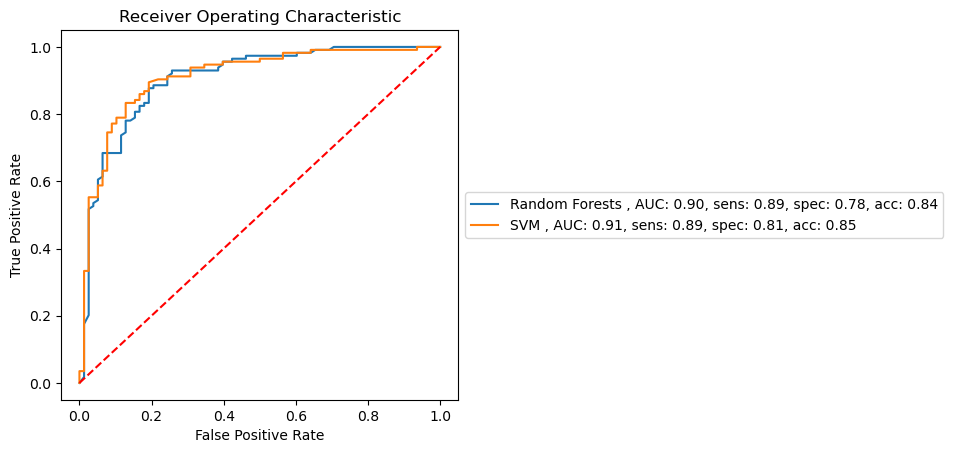

In [145]:
roc_per_model(models_to_roc, test_x_m, test_y_m)

In [146]:
model_svm_m.predict(drugs_to_test)

array([0, 0, 0, 0, 0])

In [147]:
model_RF_morgan.predict(drugs_to_test)

array([0, 0, 1, 1, 0])

In [151]:
train_x_t, test_x_t, train_y_t, test_y_t = train_test_split(df.topological.to_list(), df.activity.to_list(), test_size=0.3, random_state=4)

In [150]:
model_rf_t = RandomForestClassifier(**param)

In [152]:
model_rf_t.fit(train_x_t, train_y_t)

RandomForestClassifier(criterion='log_loss', n_estimators=200)

In [153]:
rf_t_pred = model_rf_t.predict(test_x_t)

In [154]:
recall_score(test_y_t, rf_t_pred)

0.8771929824561403

In [156]:
recall_score(test_y_t, rf_t_pred, pos_label=0)

0.7948717948717948

In [158]:
model_rf_t.predict(drugs_to_test)

array([0, 0, 0, 0, 0])

In [ ]:
model

In [116]:
def scores_per_model(model, x, y):
    test_prob = model.predict_proba(x)[:,1]
    auc = roc_auc_score(y, test_prob)
    test_pred = model.predict(x)
    sens = recall_score(y, test_pred)
    spec = recall_score(y, test_pred, pos_label=0)
    acc = accuracy_score(y, test_pred)
    return acc, sens, spec, auc

In [117]:
def crossvalidation(ml_model, df, n_folds=5, verbose=False):
    """
    Machine learning model training and validation in a cross-validation loop.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    df: pd.DataFrame
        Data set with SMILES and their associated activity labels.
    n_folds: int, optional
        Number of folds for cross-validation.
    verbose: bool, optional
        Performance measures are printed.

    Returns
    -------
    None

    """
    t0 = time.time()
    # Shuffle the indices for the k-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    # Results for each of the cross-validation folds
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = []

    # Loop over the folds
    for train_index, test_index in kf.split(df):
        # clone model -- we want a fresh copy per fold!
        fold_model = clone(ml_model)
        # Training

        # Convert the fingerprint and the label to a list
        train_x = df.iloc[train_index].morgan.tolist()
        train_y = df.iloc[train_index].activity.tolist()

        # Fit the model
        fold_model.fit(train_x, train_y)

        # Testing

        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].morgan.tolist()
        test_y = df.iloc[test_index].activity.tolist()

        # Performance for each fold
        accuracy, sens, spec, auc = scores_per_model(fold_model, test_x, test_y)

        # Save results
        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    # Print statistics of results
    print(
        f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
        f"and std : {np.std(acc_per_fold):.2f} \n"
        f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
        f"and std : {np.std(sens_per_fold):.2f} \n"
        f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
        f"and std : {np.std(spec_per_fold):.2f} \n"
        f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
        f"and std : {np.std(auc_per_fold):.2f} \n"
        f"Time taken : {time.time() - t0:.2f}s\n"
    )

    return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

In [118]:
import time
from sklearn.model_selection import KFold
from sklearn import clone

In [126]:
models_to_roc = [(model_RF_morgan, 'Random Forests'), (model_SVM_m, 'SVM')]

In [127]:
for model in models_to_roc:
    print(f"model: {model[1]}")
    crossvalidation(model[0], df, n_folds=10, verbose=True)

model: Random Forests
Mean accuracy: 0.86 	and std : 0.04 
Mean sensitivity: 0.96 	and std : 0.03 
Mean specificity: 0.50 	and std : 0.14 
Mean AUC: 0.90 	and std : 0.07 
Time taken : 2.84s

model: SVM
Mean accuracy: 0.81 	and std : 0.03 
Mean sensitivity: 0.98 	and std : 0.03 
Mean specificity: 0.21 	and std : 0.12 
Mean AUC: 0.86 	and std : 0.05 
Time taken : 11.44s



In [124]:
model_SVM_m.predict(drugs_to_test)

array([1, 1, 1, 1, 1])

In [125]:
model_RF_morgan.predict(drugs_to_test)

array([1, 1, 1, 1, 1])

In [159]:
df_to_test = pd.read_csv('../met/savolotinib_6SDE/wild_mutant.csv', engine = 'pyarrow', dtype_backend='pyarrow')

In [160]:
df_to_test.head()

,name,method,deltaG_wild,score,SMILES,mol,deltaG_mutant
0,TEPOTINIB,dice_morgan,-12.38,0.280702,CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)cc...,<rdkit.Chem.rdchem.Mol object at 0x7153260747b0>,-10.22
1,CAPMATINIB,swiss,-11.39,0.479,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F,<rdkit.Chem.rdchem.Mol object at 0x715326074ac0>,-10.25
2,IMATINIB,dice_morgan,-11.37,0.239316,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,<rdkit.Chem.rdchem.Mol object at 0x715326074c10>,-10.07
3,BELUMOSUDIL,dice_morgan,-11.32,0.245614,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3...,<rdkit.Chem.rdchem.Mol object at 0x715326074890>,-11.1
4,ACALABRUTINIB,dice_morgan,-11.06,0.288136,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,<rdkit.Chem.rdchem.Mol object at 0x715326074820>,-8.61


In [161]:
df_to_test.shape

(39, 7)

In [162]:
df_to_test['mol'] = df_to_test.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/39 [00:00<?, ?it/s]

In [163]:
df_to_test['maccs'] = df_to_test.mol.apply(dm.fp.to_fp, fp_type='maccs')

In [2]:
df = pd.read_csv('./df_with_predicted_activity.csv')

In [4]:
df.query("deltaG_mutant < deltaG_wild")

,name,method,deltaG_wild,score,SMILES,mol,deltaG_mutant,maccs,rf,svm,logestic
7,IRBESARTAN,dice_morgan,-10.78,0.201835,CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nnn...,<rdkit.Chem.rdchem.Mol object at 0x716a9595c970>,-11.11,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,0
12,LOSARTAN,dice_morgan,-10.56,0.211538,CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2...,<rdkit.Chem.rdchem.Mol object at 0x716a9595ccf0>,-11.10,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
24,LURASIDONE,dice_maccs,-10.31,0.608696,O=C1[C@@H]2[C@H]3CC[C@H](C3)[C@@H]2C(=O)N1C[C@...,<rdkit.Chem.rdchem.Mol object at 0x716a9595d230>,-10.67,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
27,CILOSTAZOL,dice_maccs,-10.27,0.652632,O=C1CCc2cc(OCCCCc3nnnn3C3CCCCC3)ccc2N1,<rdkit.Chem.rdchem.Mol object at 0x716a9595d380>,-10.45,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,0
35,NEFAZODONE,dice_maccs,-10.07,0.574257,CCc1nn(CCCN2CCN(c3cccc(Cl)c3)CC2)c(=O)n1CCOc1c...,<rdkit.Chem.rdchem.Mol object at 0x716a9595d700>,-10.37,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1


In [14]:
for i,mol in enumerate([Chem.MolFromSmiles(x) for x in df.query('deltaG_mutant < deltaG_wild').SMILES.values]):
    Chem.Draw.MolToFile(mol, filename=f"{i}_mol_.svg", imageType='svg')

In [10]:
Chem.Draw.MolToFile(Chem.MolFromSmiles("C[C@@H](c1ccc2nccn2c1)n1nnc2ncc(-c3cnn(C)c3)nc21"), filename="savolotinib.svg", imageType='svg')

In [48]:
IPythonConsole.drawOptions.fixedFontSize = 16

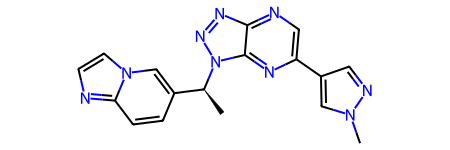

In [49]:
Chem.MolFromSmiles("C[C@@H](c1ccc2nccn2c1)n1nnc2ncc(-c3cnn(C)c3)nc21")

In [4]:
df = pd.read_csv('./savolotinib_6SDE/DeltaG_on_wild.csv')

In [5]:
df.head()

,molecule_chembl_id,deltaG
0,CHEMBL1257015,-8.31
1,CHEMBL473417,-9.41
2,CHEMBL3301607,-9.71
3,CHEMBL1521,-8.14
4,CHEMBL2103772,-9.00


In [6]:
df.shape

(914, 2)

In [7]:
import matplotlib.pyplot as plt

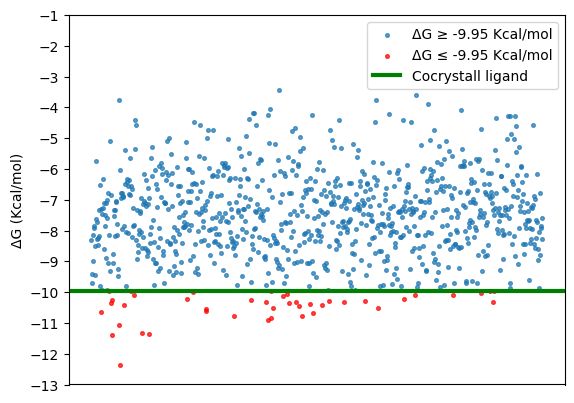

In [41]:
plt.scatter(x=df[df.deltaG > float(-9.95)].index.values,y=df[df.deltaG > float(-9.95)].deltaG.values, alpha=0.7, label='ΔG ≥ -9.95 Kcal/mol', s=7)
plt.scatter(x=df[df.deltaG <= float(-9.95)].index.values,y=df[df.deltaG <= float(-9.95)].deltaG.values, alpha=0.7, label='ΔG ≤ -9.95 Kcal/mol', color='red', s=7)
plt.yticks(range(-13,0))
plt.ylabel('ΔG (Kcal/mol)')
plt.xticks([])
plt.axhline(y=float(-9.95), lw=3, color='green', label='Cocrystall ligand')
plt.legend()
plt.savefig('./deltaG_wild.svg')

In [17]:
! pwd

/home/ramin/Desktop/personal/cheminfo/met


In [42]:
df = pd.read_csv('./df_with_predicted_activity.csv')

In [19]:
df.head()

,name,method,deltaG_wild,score,SMILES,mol,deltaG_mutant,maccs,rf,svm,logestic
0,TEPOTINIB,dice_morgan,-12.38,0.280702,CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)cc...,<rdkit.Chem.rdchem.Mol object at 0x716a9595c660>,-10.22,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
1,CAPMATINIB,swiss,-11.39,0.479000,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F,<rdkit.Chem.rdchem.Mol object at 0x716a9595c740>,-10.25,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
2,IMATINIB,dice_morgan,-11.37,0.239316,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,<rdkit.Chem.rdchem.Mol object at 0x716a9595cba0>,-10.07,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
3,BELUMOSUDIL,dice_morgan,-11.32,0.245614,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3...,<rdkit.Chem.rdchem.Mol object at 0x716a9595c7b0>,-11.10,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
4,ACALABRUTINIB,dice_morgan,-11.06,0.288136,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,<rdkit.Chem.rdchem.Mol object at 0x716a9595c820>,-8.61,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0


In [20]:
df.query('deltaG_wild > deltaG_mutant')

,name,method,deltaG_wild,score,SMILES,mol,deltaG_mutant,maccs,rf,svm,logestic
7,IRBESARTAN,dice_morgan,-10.78,0.201835,CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nnn...,<rdkit.Chem.rdchem.Mol object at 0x716a9595c970>,-11.11,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,0
12,LOSARTAN,dice_morgan,-10.56,0.211538,CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2...,<rdkit.Chem.rdchem.Mol object at 0x716a9595ccf0>,-11.10,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
24,LURASIDONE,dice_maccs,-10.31,0.608696,O=C1[C@@H]2[C@H]3CC[C@H](C3)[C@@H]2C(=O)N1C[C@...,<rdkit.Chem.rdchem.Mol object at 0x716a9595d230>,-10.67,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0,0,0
27,CILOSTAZOL,dice_maccs,-10.27,0.652632,O=C1CCc2cc(OCCCCc3nnnn3C3CCCCC3)ccc2N1,<rdkit.Chem.rdchem.Mol object at 0x716a9595d380>,-10.45,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,0
35,NEFAZODONE,dice_maccs,-10.07,0.574257,CCc1nn(CCCN2CCN(c3cccc(Cl)c3)CC2)c(=O)n1CCOc1c...,<rdkit.Chem.rdchem.Mol object at 0x716a9595d700>,-10.37,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,1,1


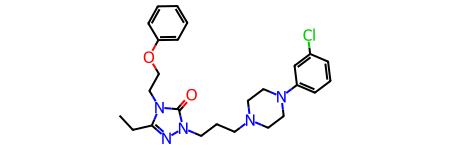

In [51]:
Chem.Draw.MolToFile(Chem.MolFromSmiles(df[df.name == 'NEFAZODONE'].SMILES.values[0]), filename="nefazodone.svg", imageType='svg')
Chem.MolFromSmiles(df[df.name == 'NEFAZODONE'].SMILES.values[0])

In [49]:
df['name'] = df.name.str.capitalize()

In [37]:
df['model_count'] = df[['rf', 'svm', 'logestic']].sum(axis=1)

In [30]:
import seaborn as sns

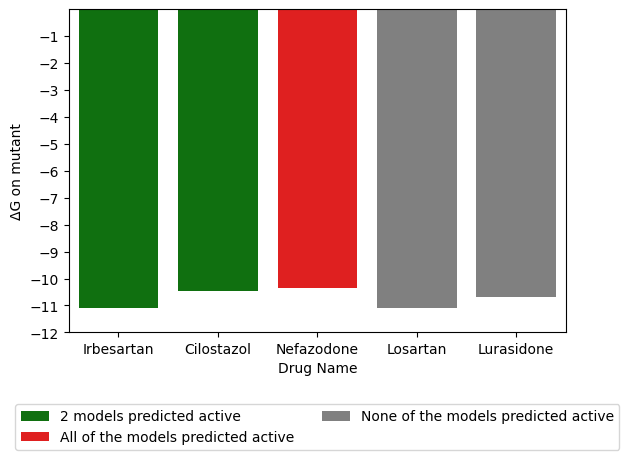

In [75]:

sns.barplot(data=df.query("deltaG_mutant < deltaG_wild and model_count == 2"), x='name', y='deltaG_mutant', color='green', label='2 models predicted active')
sns.barplot(data=df.query("deltaG_mutant < deltaG_wild and model_count > 2"), x='name', y='deltaG_mutant', color='red', label='All of the models predicted active')
sns.barplot(data=df.query("deltaG_mutant < deltaG_wild and model_count < 2"), x='name', y='deltaG_mutant', color='gray', label='None of the models predicted active')
plt.ylabel('ΔG on mutant')
plt.xlabel('Drug Name')
plt.yticks(range(-12,0))
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncols=2)

plt.tight_layout()
plt.savefig('./barplot.svg')
#plt.xticks(rotation=45, ha='right')

In [78]:
df.sort_values('deltaG_mutant')[['rf','svm','logestic','name']]

,rf,svm,logestic,name
7,1,1,0,Irbesartan
3,0,0,0,Belumosudil
12,0,0,0,Losartan
24,0,0,0,Lurasidone
10,0,1,0,Olaparib
27,1,1,0,Cilostazol
35,1,1,1,Nefazodone
1,0,0,0,Capmatinib
0,0,0,0,Tepotinib
29,0,0,0,Netarsudil
